In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("breast-cancer-wisconsin.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [8]:
df['Uniformity of Cell Shape'].value_counts()

1     346
10     58
2      58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: Uniformity of Cell Shape, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [10]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
df1 = df.drop(['Sample code number'], axis=1)

In [12]:
df.shape

(683, 11)

In [13]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(683, 11)

<AxesSubplot:>

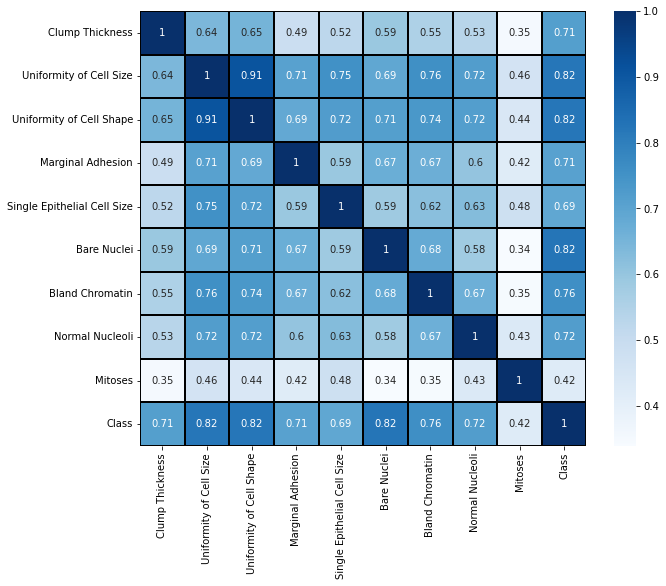

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), cmap='Blues', annot=True, linewidths=2, linecolor='black',)

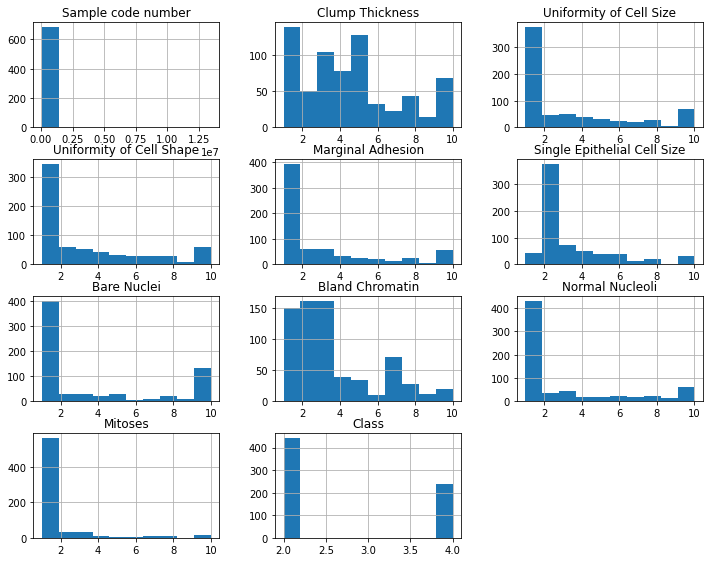

In [17]:
df.hist(figsize=(12,12), layout=(5,3));

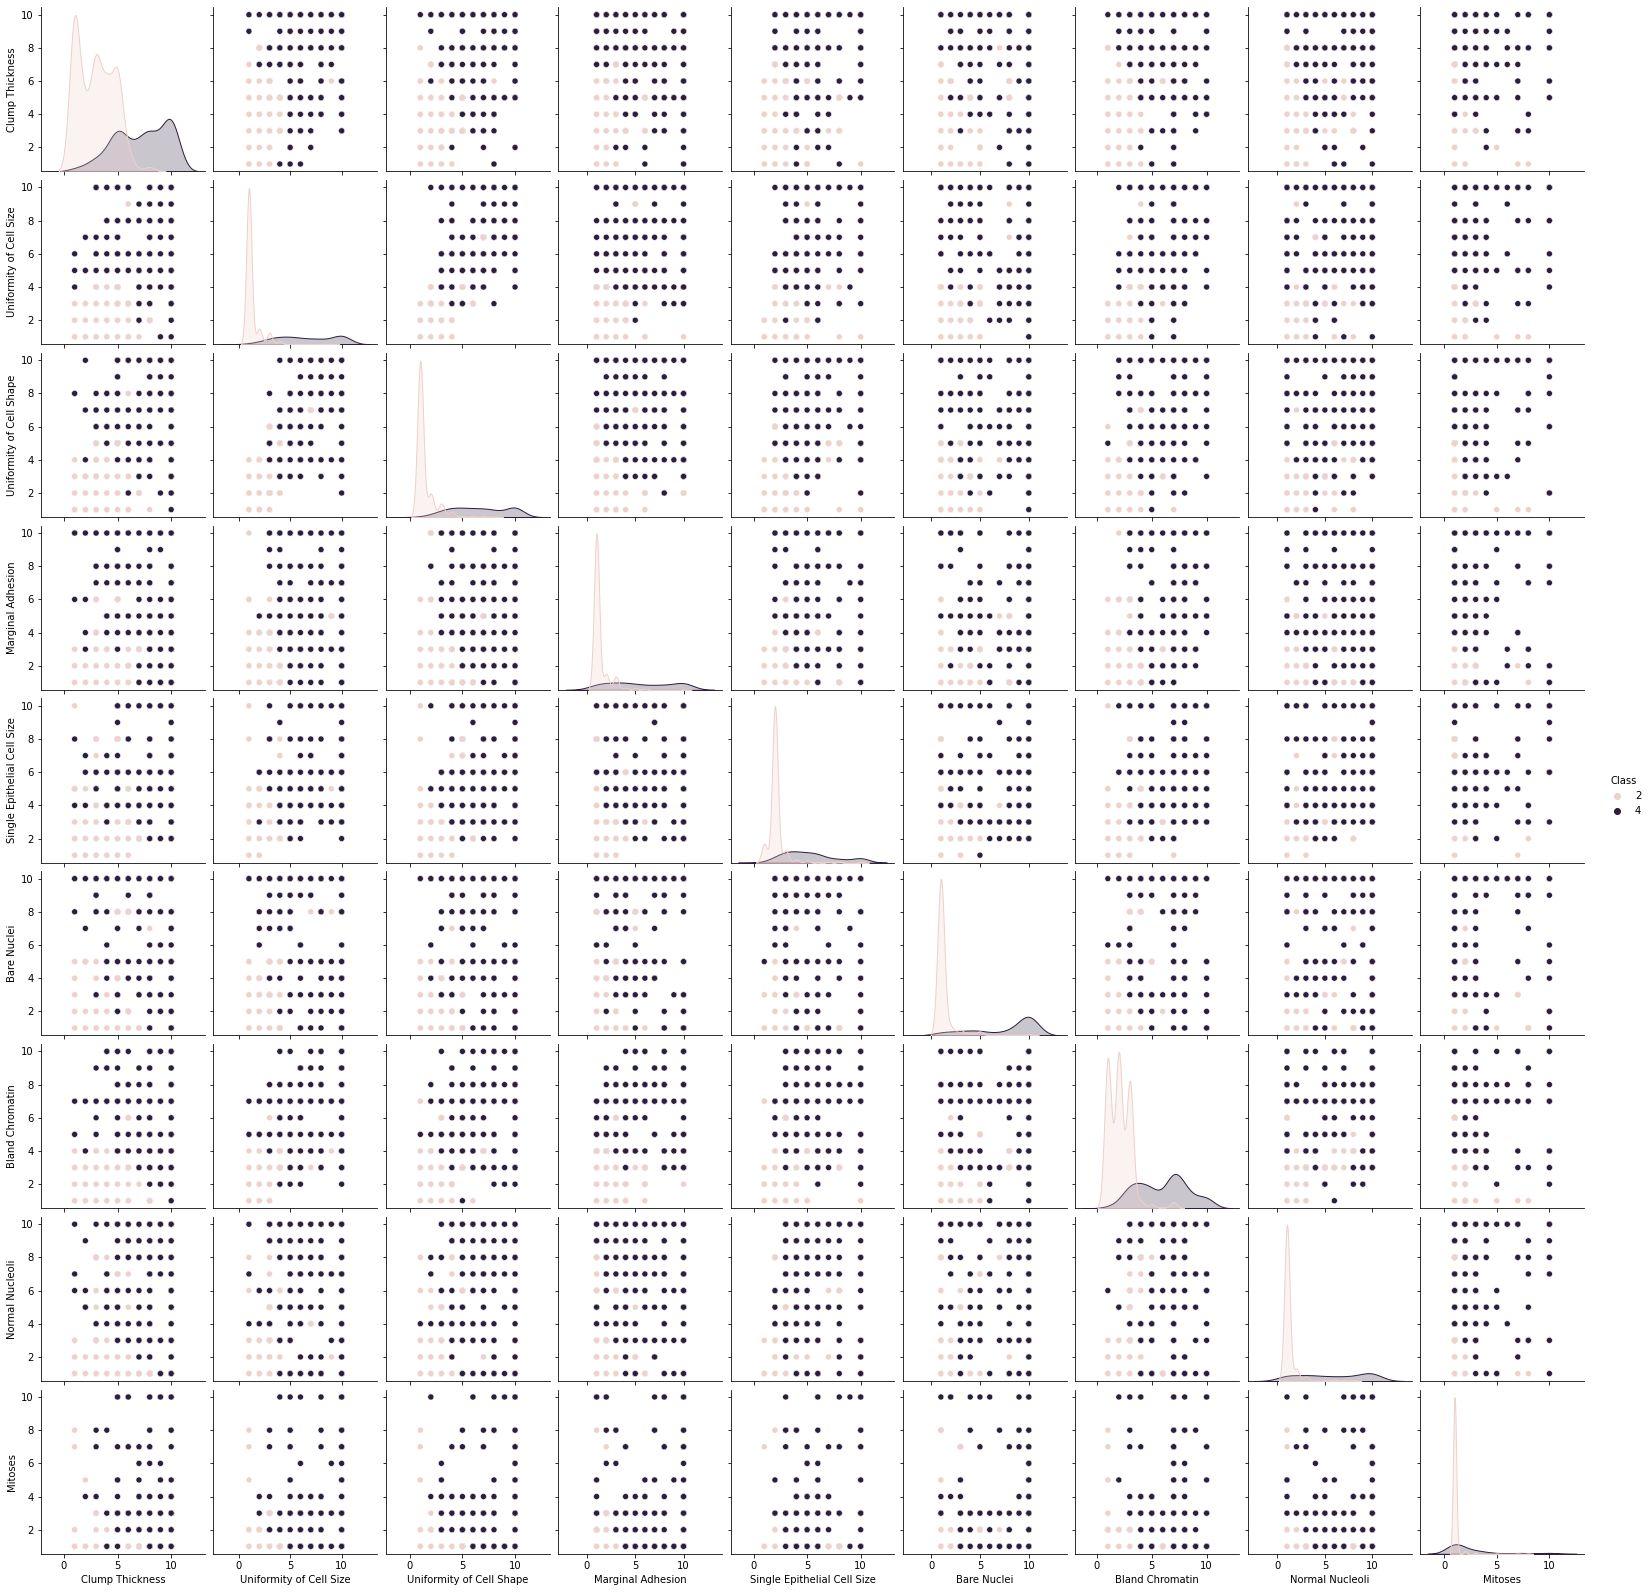

In [18]:
sns.pairplot(df.drop(['Sample code number'], axis=1), hue='Class')

In [19]:
data= df.drop(['Uniformity of Cell Shape','Sample code number'], axis=1)
X= data.drop('Class', axis=1)
y= data['Class']

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.30)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(478, 8)
(205, 8)
(478,)
(205,)


In [21]:
!pip install imblearn

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [23]:
print(y_train.value_counts())
print(y_test.value_counts())


2    320
4    158
Name: Class, dtype: int64
2    124
4     81
Name: Class, dtype: int64


In [24]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test.astype('float'),y_test)

In [25]:
print(y_train_smote.value_counts())
print(y_test_smote.value_counts())

4    320
2    320
Name: Class, dtype: int64
2    124
4    124
Name: Class, dtype: int64


In [26]:
X_train

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
171,5,10,3,8,1,5,10,3
129,2,1,1,2,1,3,1,1
90,4,1,1,2,1,3,1,1
492,1,1,1,2,4,1,1,1
586,1,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...
512,4,1,1,2,1,3,1,1
205,8,10,8,4,8,7,7,1
81,3,1,1,2,2,7,1,1
518,3,1,1,2,1,2,1,1


In [27]:
print(X_train['Marginal Adhesion'].value_counts())
print(X_train_smote['Marginal Adhesion'].value_counts())

1     283
3      44
2      37
10     36
4      19
8      18
5      16
6      12
7      11
9       2
Name: Marginal Adhesion, dtype: int64
1.000000     288
10.000000     60
3.000000      49
2.000000      40
8.000000      27
            ... 
1.957495       1
3.926108       1
4.377477       1
4.973660       1
2.154362       1
Name: Marginal Adhesion, Length: 111, dtype: int64


In [28]:
print('X_train-', X_train_smote.shape)
print('X_test-',X_test_smote.shape)
print('y_train-', y_train_smote.shape)
print('y_test-', y_test_smote.shape)

X_train- (640, 8)
X_test- (248, 8)
y_train- (640,)
y_test- (248,)


In [29]:
y_test.value_counts()

2    124
4     81
Name: Class, dtype: int64

In [26]:
# this list will contain scores of all the ensemble ML models and models which are base estimator of ensemble models
scores=[]

### 1- Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000)

model1=lr.fit(X_train_smote,y_train_smote)
prediction1=model1.predict(X_test_smote)

In [28]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test_smote,prediction1)
cm

array([[129,   4],
       [  6, 127]], dtype=int64)

<AxesSubplot:>

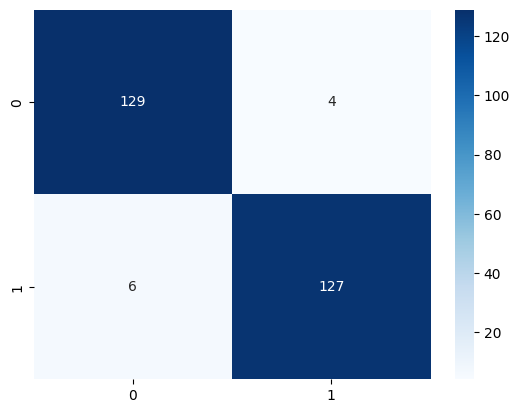

In [29]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='d')

In [30]:
from sklearn.metrics import accuracy_score
scores.append(accuracy_score(y_test_smote,prediction1))
accuracy_score(y_test_smote,prediction1)

0.9624060150375939

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, prediction1))

              precision    recall  f1-score   support

           2       0.96      0.97      0.96       133
           4       0.97      0.95      0.96       133

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



## 2- Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=2)
model2=dtc.fit(X_train_smote,y_train_smote)
prediction2=model2.predict(X_test_smote)
cm2= confusion_matrix(y_test_smote,prediction2)

In [33]:
cm2

array([[127,   6],
       [  6, 127]], dtype=int64)

<AxesSubplot:>

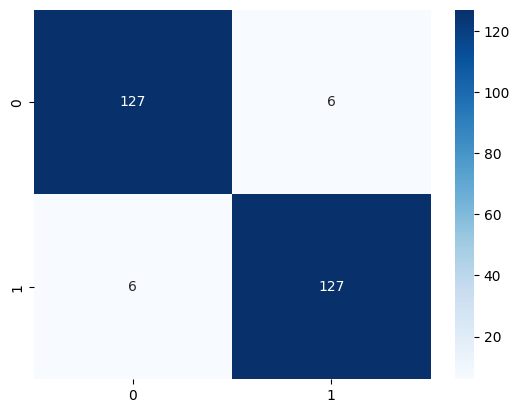

In [34]:
sns.heatmap(cm2, annot=True,cmap='Blues', fmt='d')

In [35]:
scores.append(accuracy_score(y_test_smote,prediction2))
accuracy_score(y_test_smote,prediction2)

0.9548872180451128

In [36]:
print(classification_report(y_test_smote, prediction2))

              precision    recall  f1-score   support

           2       0.95      0.95      0.95       133
           4       0.95      0.95      0.95       133

    accuracy                           0.95       266
   macro avg       0.95      0.95      0.95       266
weighted avg       0.95      0.95      0.95       266



## 3- Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(bootstrap=False,
 max_depth=6,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=10)
model3 = rfc.fit(X_train_smote, y_train_smote)
prediction3 = model3.predict(X_test_smote)
cm3=confusion_matrix(y_test_smote, prediction3)

C:\Users\hassa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<AxesSubplot:>

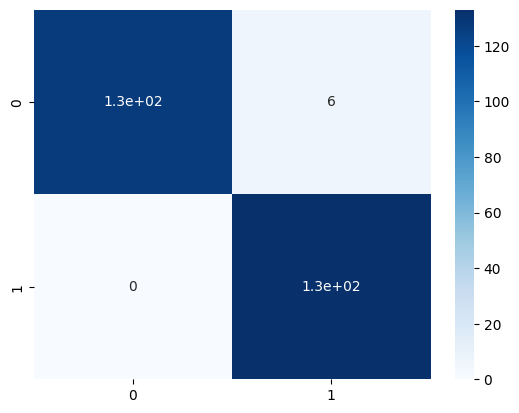

In [38]:
sns.heatmap(cm3, annot=True,cmap='Blues')

In [39]:
scores.append(accuracy_score(y_test_smote,prediction3))
accuracy_score(y_test_smote,prediction3)

0.9774436090225563

In [40]:
print(classification_report(y_test_smote, prediction3))

              precision    recall  f1-score   support

           2       1.00      0.95      0.98       133
           4       0.96      1.00      0.98       133

    accuracy                           0.98       266
   macro avg       0.98      0.98      0.98       266
weighted avg       0.98      0.98      0.98       266



### SupportVectorClassifier

In [41]:
from sklearn.svm import SVC

svm=SVC(kernel='linear', probability=True)
model4=svm.fit(X_train_smote,y_train_smote)
prediction4=model4.predict(X_test_smote)
cm4= confusion_matrix(y_test_smote,prediction4)

In [42]:
cm4

array([[127,   6],
       [  2, 131]], dtype=int64)

<AxesSubplot:>

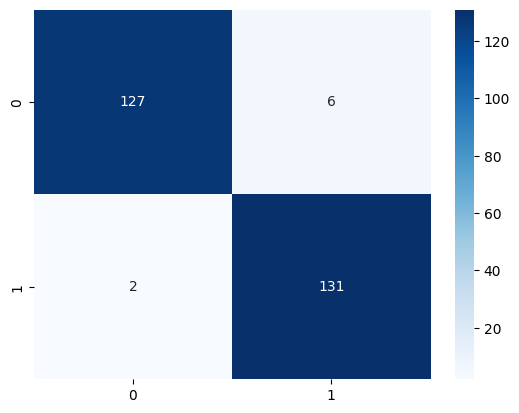

In [43]:
sns.heatmap(cm4, annot=True, cmap='Blues', fmt='d')

In [44]:
scores.append(accuracy_score(y_test_smote,prediction4))
accuracy_score(y_test_smote, prediction4)

0.9699248120300752

In [45]:
print(classification_report(y_test_smote, prediction4))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       133
           4       0.96      0.98      0.97       133

    accuracy                           0.97       266
   macro avg       0.97      0.97      0.97       266
weighted avg       0.97      0.97      0.97       266



### 5- Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing= 2e-9)
model5 = NB.fit(X_train_smote, y_train_smote)
prediction5 = model5.predict(X_test_smote)
cm5=confusion_matrix(y_test_smote, prediction5)

In [47]:
cm5

array([[125,   8],
       [  6, 127]], dtype=int64)

<AxesSubplot:>

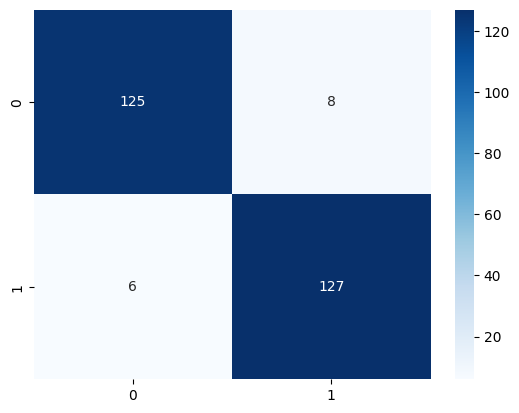

In [48]:
sns.heatmap(cm5, annot=True, cmap='Blues', fmt='d')

In [49]:
scores.append(accuracy_score(y_test_smote,prediction5))
accuracy_score(y_test_smote, prediction5)

0.9473684210526315

In [50]:
print(classification_report(y_test_smote, prediction5))

              precision    recall  f1-score   support

           2       0.95      0.94      0.95       133
           4       0.94      0.95      0.95       133

    accuracy                           0.95       266
   macro avg       0.95      0.95      0.95       266
weighted avg       0.95      0.95      0.95       266



### 6- KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
model6 = KNN.fit(X_train_smote, y_train_smote)
prediction6 = model6.predict(X_test_smote)
cm6=confusion_matrix(y_test_smote, prediction5)
cm6

array([[125,   8],
       [  6, 127]], dtype=int64)

<AxesSubplot:>

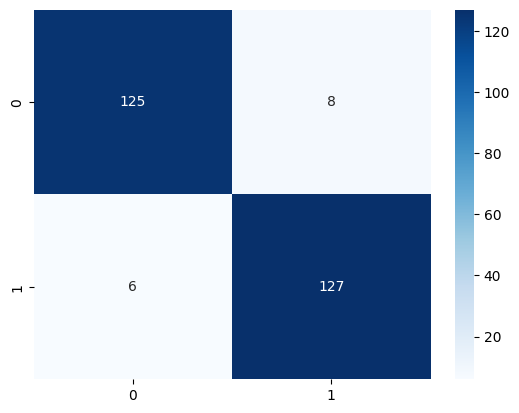

In [52]:
sns.heatmap(cm6, annot=True, cmap='Blues', fmt='d')

In [53]:
scores.append(accuracy_score(y_test_smote,prediction6))
accuracy_score(y_test_smote, prediction6)

0.9624060150375939

In [54]:
print(classification_report(y_test_smote, prediction6))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       133
           4       0.96      0.97      0.96       133

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



### Random Forest Model with Hyperparameter tuning using GridSearchCV

In [55]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4, 6, 8]
# Minimum number of samples required to split a node
min_samples_split = [2, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [56]:
# Create the paramaters grid
param_grid_1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid_1)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 50], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [57]:
from sklearn.model_selection import GridSearchCV
E_model_1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_1, cv = 3, verbose=5, n_jobs = -1)
E_model_1

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=5)

In [58]:
E_model_1.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=5)

In [59]:
# print(accuracy_score(y_test, E_predicted_1))
scores.append(E_model_1.best_score_)
E_model_1.best_score_

0.9871330360460795

In [60]:
E_model_1.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [61]:
E_prediction_1=E_model_1.predict(X_test_smote)
accuracy_score(y_test_smote, E_prediction_1)

0.9774436090225563

In [62]:
print(classification_report(y_test_smote, E_prediction_1))

              precision    recall  f1-score   support

           2       1.00      0.95      0.98       133
           4       0.96      1.00      0.98       133

    accuracy                           0.98       266
   macro avg       0.98      0.98      0.98       266
weighted avg       0.98      0.98      0.98       266



### Decision Tree Classifier with Hyperparameter tuning using GridSearchCV

In [63]:
param_grid_2={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}

In [64]:
from sklearn.model_selection import GridSearchCV
E_model_2=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_2, cv=10, n_jobs=-1)

In [65]:
E_model_2.fit(X_train_smote, y_train_smote)

C:\Users\hassa\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hassa\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hassa\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\hassa\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [66]:
E_prediction_2=E_model_2.predict(X_test_smote)
accuracy_score(y_test_smote, E_prediction_2)

0.9661654135338346

In [67]:
print(classification_report(y_test_smote, E_prediction_2))

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       133
           4       0.96      0.97      0.97       133

    accuracy                           0.97       266
   macro avg       0.97      0.97      0.97       266
weighted avg       0.97      0.97      0.97       266



In [68]:
scores.append(E_model_2.best_score_)
E_model_2.best_score_

0.9694572452636969

In [69]:
E_model_2.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

### Adaboost Classifier with Hyperparameter tuning using GridSearchCV

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ADC=AdaBoostClassifier(n_estimators=150, learning_rate=1.5)
E_model_3=ADC.fit(X_train_smote, y_train_smote)
E_predicted_3=E_model_3.predict(X_test_smote)
accuracy_score(y_test_smote, E_predicted_3)

0.9699248120300752

In [71]:
# Applying GridSearchCV
param_grid_3={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [72]:
E_model_3=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_3, n_jobs=-1, cv=10, scoring='accuracy')

In [73]:
E_model_3.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
                         'n_estimators': [10, 50, 75, 100, 150, 200]},
             scoring='accuracy')

In [74]:
E_prediction_3=E_model_3.predict(X_test_smote)
accuracy_score(y_test_smote, E_prediction_3)

0.9586466165413534

In [75]:
scores.append(E_model_3.best_score_)
E_model_3.best_score_

0.9742703533026115

In [76]:
print(classification_report(y_test_smote, E_prediction_3))

              precision    recall  f1-score   support

           2       0.98      0.94      0.96       133
           4       0.94      0.98      0.96       133

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



In [77]:
E_model_3.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}

Gradient Boost Classifier with Hyperparameter tuning using GridSearchCV

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GBC=GradientBoostingClassifier(n_estimators=16, learning_rate=1.59)
GradientBoostingClassifier()
E_model_4=GBC.fit(X_train_smote, y_train_smote)
E_predicted_4=E_model_4.predict(X_test_smote)
accuracy_score(y_test_smote, E_predicted_4)

0.9699248120300752

In [79]:
#Applying GrirSearchCV
param_grid_4={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5]
}

In [80]:
E_model_4=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_4, n_jobs=-1, cv=10, scoring='accuracy')
E_model_4.fit(X_train_smote, y_train_smote)
E_prediction_4 = E_model_4.predict(X_test_smote)

In [81]:
scores.append(E_model_4.best_score_)
E_model_4.best_score_

0.9807219662058373

In [82]:
print(classification_report(y_test_smote, E_prediction_4))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97       133
           4       0.96      0.99      0.97       133

    accuracy                           0.97       266
   macro avg       0.97      0.97      0.97       266
weighted avg       0.97      0.97      0.97       266



In [83]:
E_model_4.best_params_

{'learning_rate': 0.5, 'n_estimators': 75}

In [84]:
print(E_model_4)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [10, 50, 75, 100, 150, 200]},
             scoring='accuracy')


### XgBoost Classifier with Hyperparameter tuning using GridSearchCV

In [85]:
pip install xgboost==0.90


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train_smote)

In [87]:
from xgboost import XGBClassifier
XGB=XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=45)
E_model_5=XGB.fit(X_train_smote, y_train_smote)
E_predicted_5=E_model_5.predict(X_test_smote)
accuracy_score(y_test_smote, E_predicted_5)

0.9624060150375939

In [88]:
# Applying GridSearchCV
param_grid_5={
    'n_estimators': [10, 50, 75, 100, 175, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.4, 0.5, 0.6],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

In [89]:
E_model_5=GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_5, verbose=1, n_jobs=-1, cv=5)
E_model_5.fit(X_train_smote, y_train_smote)
E_predicted_5=E_model_5.predict(X_test_smote)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


In [90]:
print(classification_report(y_test_smote, E_predicted_5))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96       133
           4       0.95      0.98      0.96       133

    accuracy                           0.96       266
   macro avg       0.96      0.96      0.96       266
weighted avg       0.96      0.96      0.96       266



In [91]:
E_model_5.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [92]:
scores.append(E_model_5.best_score_)
E_model_5.best_score_

0.9807225806451614

### LGBM Classifier with Hyperparameter tuning using GridSearchCV

In [93]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
from lightgbm import LGBMClassifier

In [95]:
LGB=LGBMClassifier(n_estimators=45, learning_rate=0.065, num_leaves=30, random_state=42, objective='binary')
E_model_6=LGB.fit(X_train_smote, y_train_smote)
E_predicted_6=E_model_6.predict(X_test_smote)
accuracy_score(y_test_smote, E_predicted_6)

0.9661654135338346

In [96]:
# Applying GridSearchCV
param_grid_6={
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.05, 0.1, 0.3],
    'num_leaves': [20, 50, 80, 100]
}

In [97]:
E_model_6=GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_6, verbose=1, n_jobs=-1, cv=10)
E_model_6.fit(X_train_smote, y_train_smote)
E_predicted_6=E_model_6.predict(X_test_smote)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [98]:
print(classification_report(E_predicted_6, y_test_smote))

              precision    recall  f1-score   support

           2       0.96      0.99      0.98       129
           4       0.99      0.96      0.98       137

    accuracy                           0.98       266
   macro avg       0.98      0.98      0.98       266
weighted avg       0.98      0.98      0.98       266



In [99]:
E_model_6.best_params_

{'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 20}

In [100]:
scores.append(E_model_6.best_score_)
E_model_6.best_score_

0.9806707629288276

Custom Classifier (PROPOSED METHOD)

In [101]:
data= df.drop(['Uniformity of Cell Shape','Sample code number'], axis=1)

X1 = data.iloc[:,:-1]
y1 = data.iloc[:,-1]


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y1 = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set (30 - 70)
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)


X_train_smote1, y_train_smote1 = smote.fit_resample(X_train1.astype('float'),y_train1)
X_test_smote1, y_test_smote1 = smote.fit_resample(X_test1.astype('float'),y_test1)

NameError: name 'X1' is not defined

In [31]:
print(y_train1.shape)
print(y_train_smote1.shape)
print(y_test1.shape)
print(y_test_smote1.shape)

NameError: name 'y_train1' is not defined

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu',input_dim = 8)) #adding the first input and the first hidden layer
#adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

#adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
#adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

classifier.add(Dense(units = 1, kernel_initializer='uniform', activation = 'sigmoid'))



In [33]:
classifier.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [105]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=('accuracy'))

In [106]:
classifier.fit(X_train_smote1, y_train_smote1, batch_size=5, epochs=70)

Epoch 1/70
126/126 [==============================] - 1s 2ms/step - loss: 0.6534 - accuracy: 0.8360
Epoch 2/70
126/126 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.9697
Epoch 3/70
126/126 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.9634
Epoch 4/70
126/126 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 0.9745
Epoch 5/70
126/126 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9729
Epoch 6/70
126/126 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9697
Epoch 7/70
126/126 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 0.9666
Epoch 8/70
126/126 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9697
Epoch 9/70
126/126 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9729
Epoch 10/70
126/126 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9697

9/9 [==============================] - 0s 1ms/step
[Epoch:70] Our accuracy is 95.38461538461539%


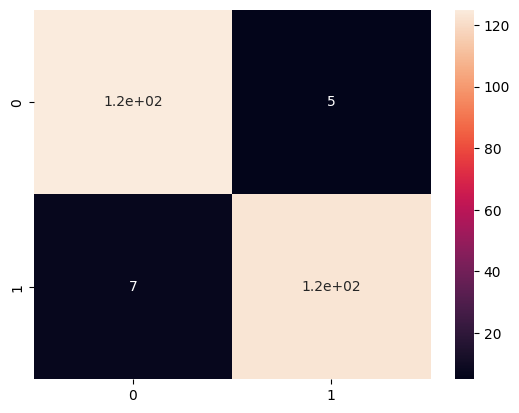

In [107]:
y_pred = classifier.predict(X_test_smote1)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm11 = confusion_matrix(y_test_smote1, y_pred)


print("[Epoch:70] Our accuracy is {}%".format(((cm11[0][0] + cm11[1][1])/260)*100))

sns.heatmap(cm11,annot=True)
plt.savefig('epoch70.png')

## AUC for Ensemble Learning Models

In [108]:
from sklearn.metrics import roc_curve,roc_auc_score

In [109]:
# df['Insurance'] = df['Insurance'].map({'yes': 1, 'no': 0})
y_test_smote = y_test_smote.map({2: 0, 4: 1})

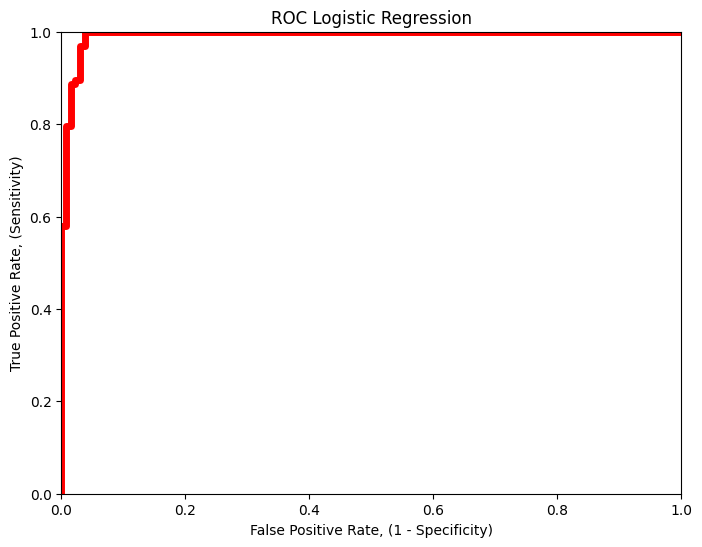

In [110]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, lr.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Logistic Regression')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Support Vector Classifier

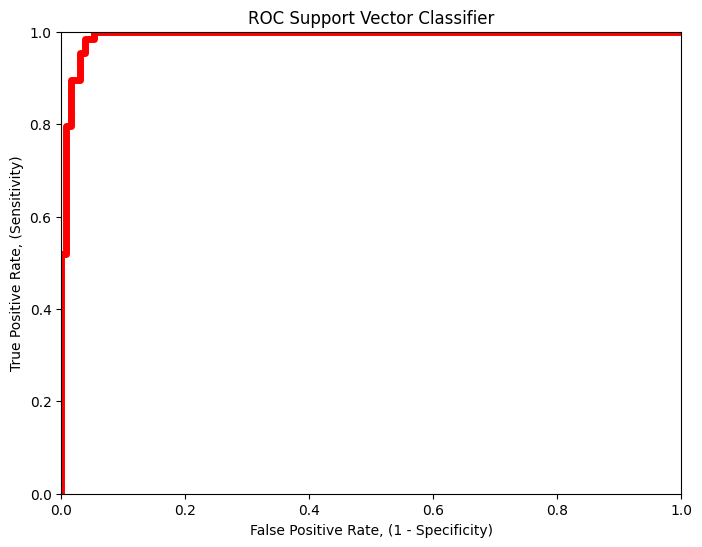

In [111]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, model4.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Support Vector Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Random Forest

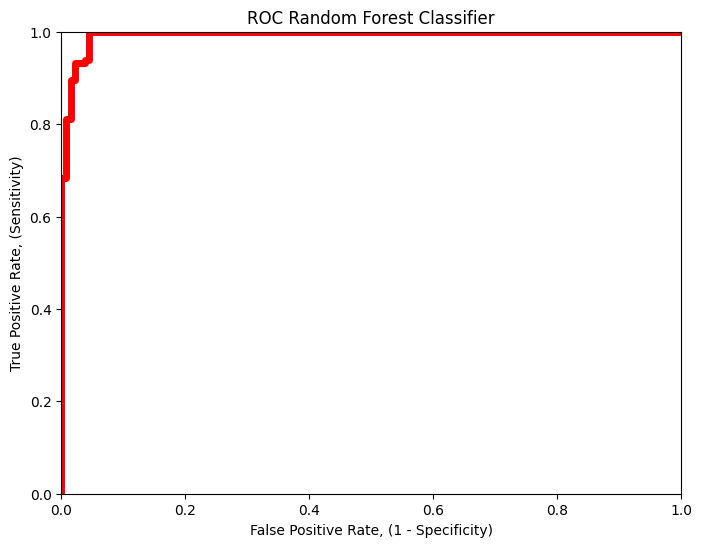

In [112]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, E_model_1.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Random Forest Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Decision Tree Classifier

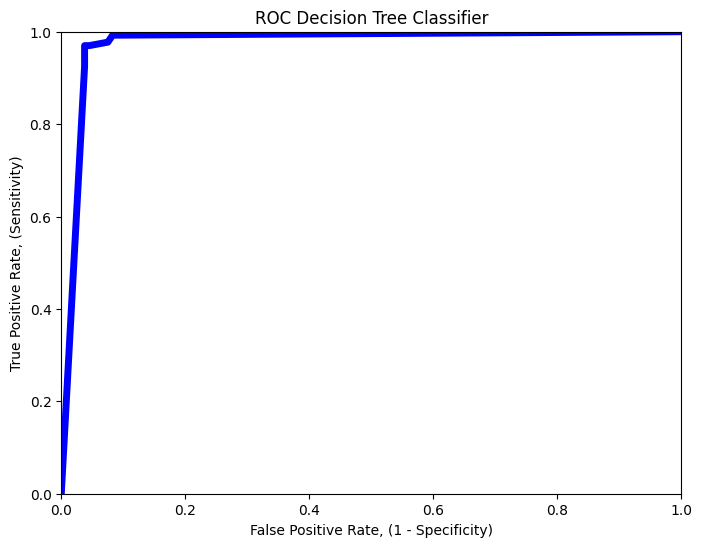

In [113]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, E_model_2.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Decision Tree Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='blue',lw=5)
plt.show()

### Naive Bayes

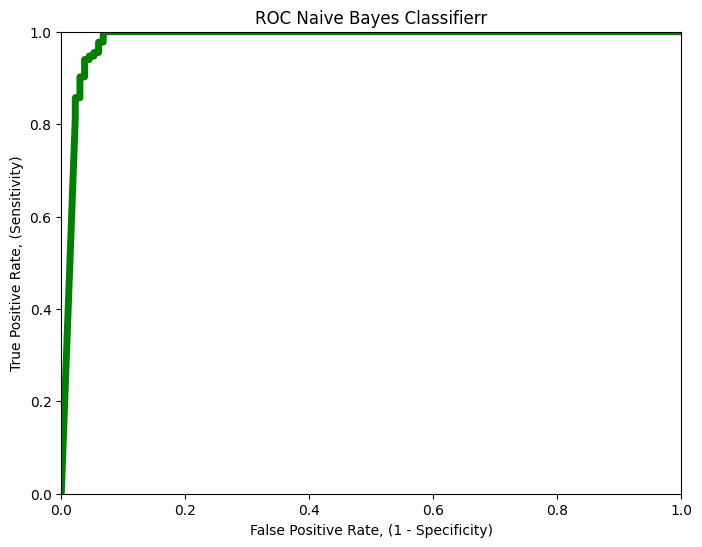

In [114]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, NB.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Naive Bayes Classifierr')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### KNN

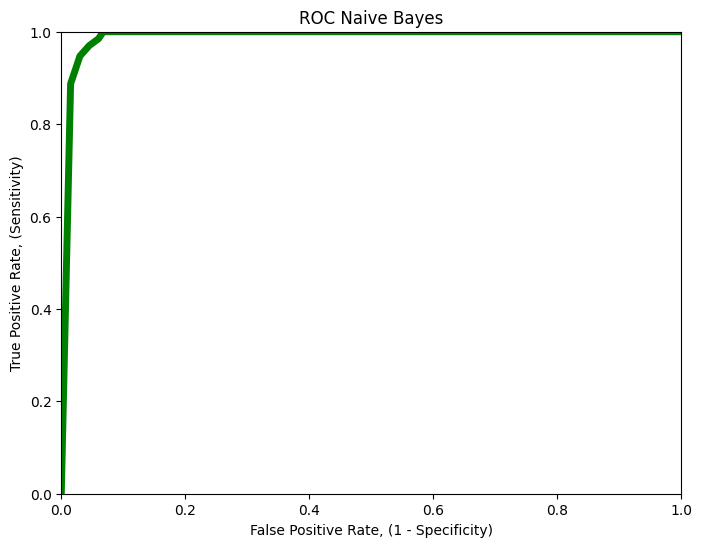

In [115]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, KNN.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Naive Bayes')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### AdaBoost Classifier

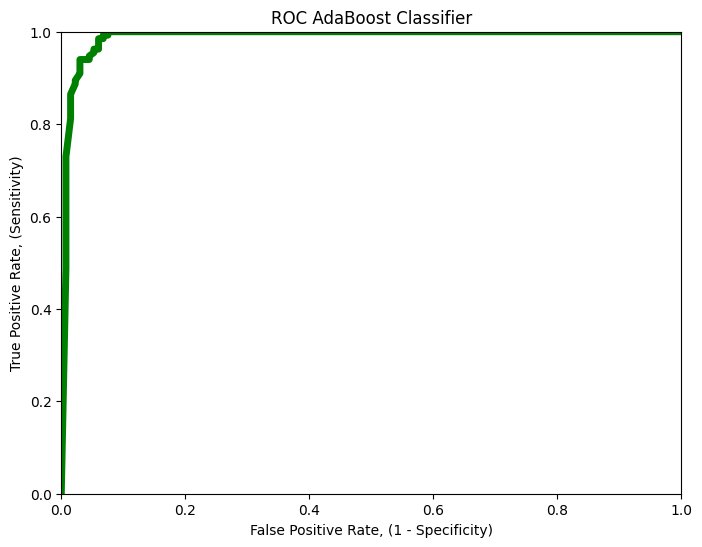

In [116]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, E_model_3.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC AdaBoost Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### GradientBoosting Classifier

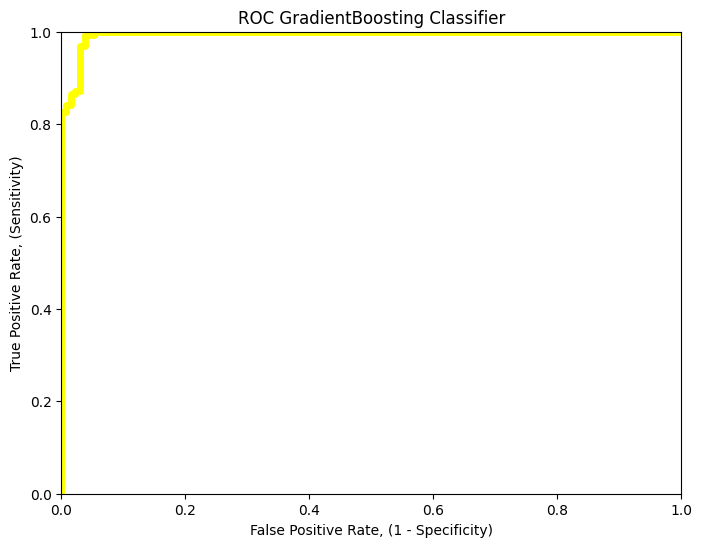

In [117]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, E_model_4.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC GradientBoosting Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='yellow',lw=5)
plt.show()

### XgBoost Classifier

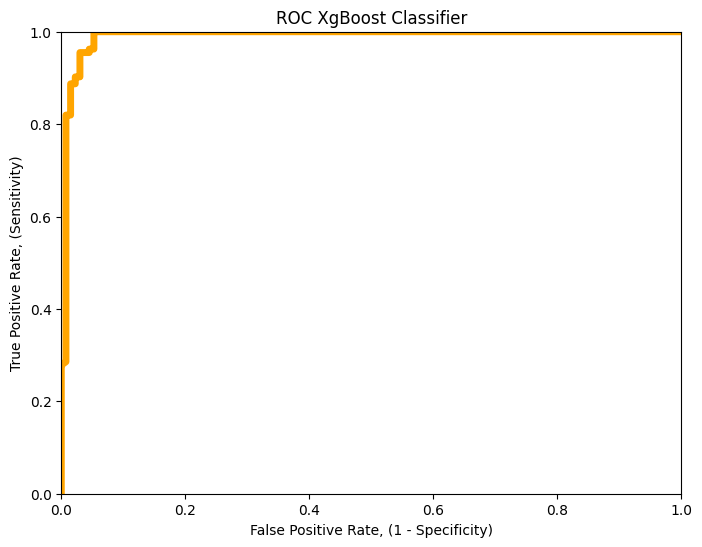

In [118]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, E_model_5.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC XgBoost Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='orange',lw=5)
plt.show()

### Light GBMClassifier

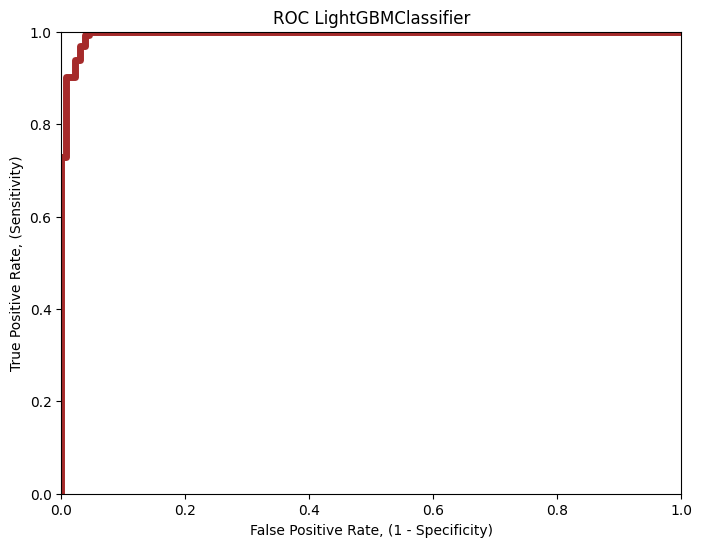

In [119]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test_smote, E_model_6.predict_proba(X_test_smote)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC LightGBMClassifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='brown',lw=5)
plt.show()

ARTIFICIAL NEURAL NETWORK 


AUC: 0.954


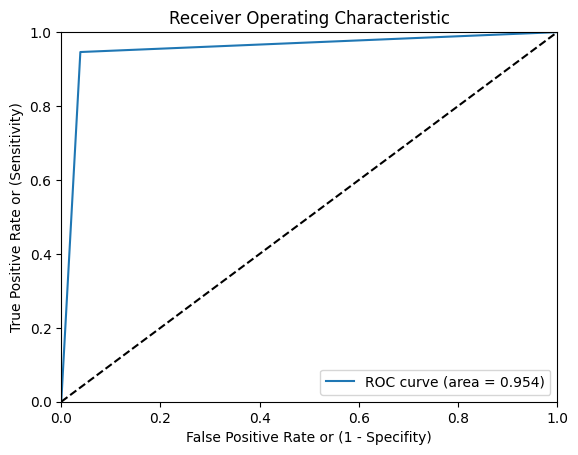

In [120]:
fpr, tpr, thresholds = roc_curve(y_test_smote1, y_pred)
auc = roc_auc_score(y_test_smote1, y_pred)
print('AUC: %.3f' % auc)

#plotting the auc curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

7/7 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

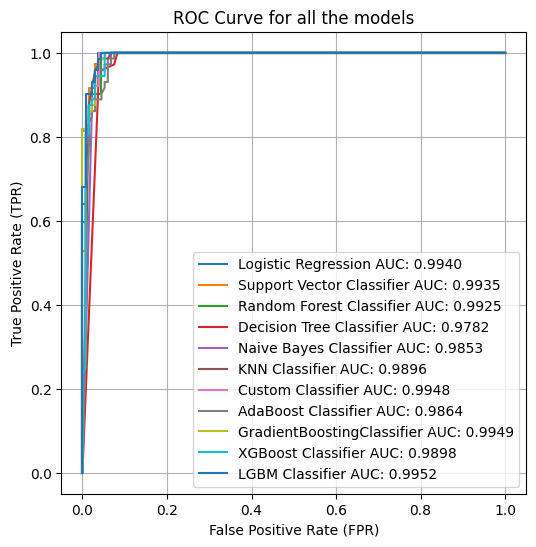

<Figure size 640x480 with 0 Axes>

In [122]:
from sklearn import metrics
plt.figure(0).clf()

plt.figure(figsize=(6, 6))

y_pred = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression")



y_pred = model4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc1 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Support Vector Classifier")



y_pred = E_model_1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc2 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC= 0.963")

y_pred = E_model_2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc3 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC= 0.919")

y_pred = NB.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc4 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC= 0.954")

y_pred = KNN.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc5 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC= 0.971")

y_pred = classifier.predict(X_test1)
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred,)
auc6 = round(metrics.roc_auc_score(y_test1, y_pred), 4)
plt.plot(fpr,tpr,label="Custom ANN")


y_pred = E_model_3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc7 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost Classifier")

y_pred = E_model_4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc8 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boost")

y_pred = E_model_5.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc9 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost")



y_pred = E_model_6.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label = 4)
auc10 = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LGBM Classifier")

#add legend
plt.legend(['Logistic Regression AUC: %.4f' % auc,
'Support Vector Classifier AUC: %.4f' % auc1, 
'Random Forest Classifier AUC: %.4f' % auc2, 
'Decision Tree Classifier AUC: %.4f' % auc3,
'Naive Bayes Classifier AUC: %.4f' % auc4,
'KNN Classifier AUC: %.4f' % auc5,
'Custom Classifier AUC: %.4f' % auc6,
'AdaBoost Classifier AUC: %.4f' % auc7,
'GradientBoostingClassifier AUC: %.4f'% auc8,
'XGBoost Classifier AUC: %.4f' % auc9,
'LGBM Classifier AUC: %.4f'% auc10])

plt.title('ROC Curve for all the models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()
plt.savefig("ROCs.png")